##                                                      ML ASSIGNMENT-02

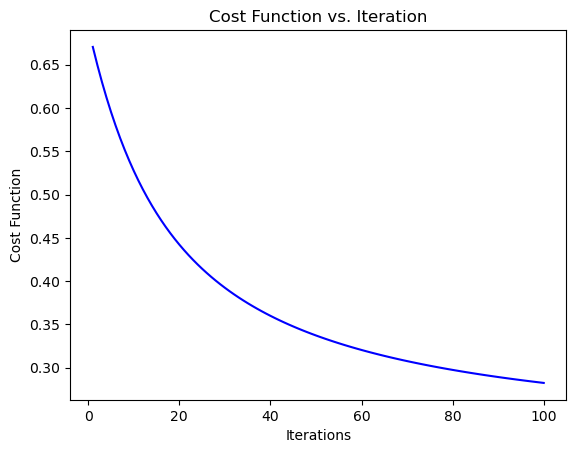

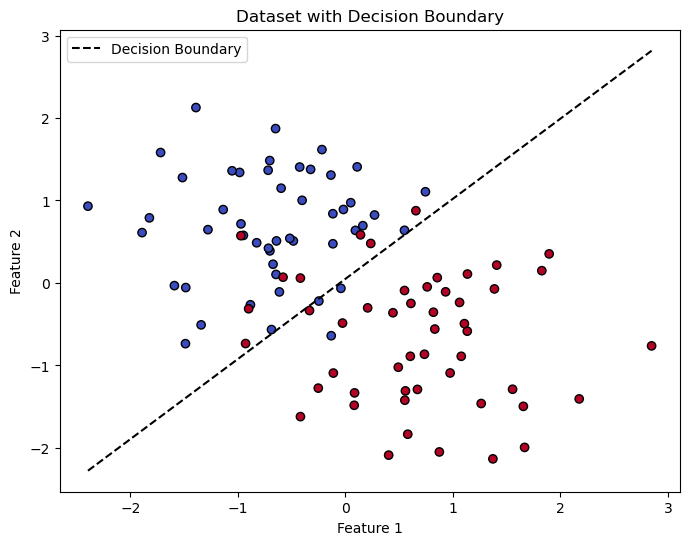

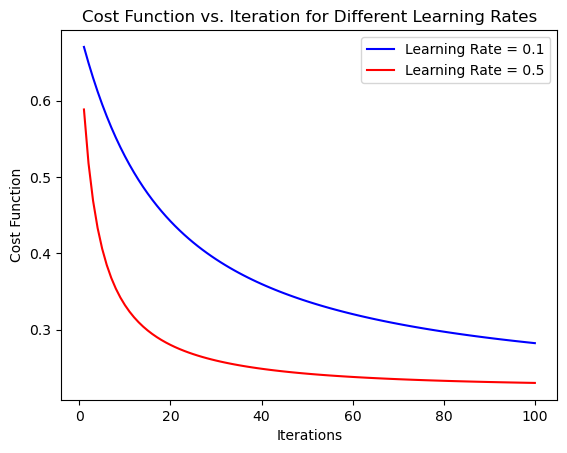

Confusion Matrix:
[[46.  3.]
 [ 8. 42.]]
Accuracy: 0.8888888888888888
Precision: 0.9333333333333333
Recall: 0.84
F1 Score: 0.8842105263157894


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


X = pd.read_csv("logisticX.csv")
y = pd.read_csv("logisticY.csv")


X = (X - X.mean()) / X.std()

X.insert(0, 'intercept', 1)


X = X.values
y = y.values.flatten()


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    J = (-1/m) * (np.log(h).T.dot(y) + np.log(1 - h).T.dot(1 - y))
    return J


def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = (1/m) * X.T.dot(h - y)
        theta -= alpha * gradient
        cost = cost_function(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history


theta = np.zeros(X.shape[1])
alpha = 0.1
iterations = 100


theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)


plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Iteration')
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], X[:, 2], c=y, cmap='coolwarm', edgecolors='k')
x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1]*x_boundary) / theta[2]
plt.plot(x_boundary, y_boundary, color='black', linestyle='--', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset with Decision Boundary')
plt.legend()
plt.show()


alpha_2 = 0.5
theta_2 = np.zeros(X.shape[1])
theta_2, cost_history_2 = gradient_descent(X, y, theta_2, alpha_2, iterations)


plt.plot(range(1, iterations + 1), cost_history, color='blue', label='Learning Rate = 0.1')
plt.plot(range(1, iterations + 1), cost_history_2, color='red', label='Learning Rate = 0.5')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Iteration for Different Learning Rates')
plt.legend()
plt.show()


predictions = np.round(sigmoid(X.dot(theta)))
confusion_matrix = np.zeros((2, 2))
for i in range(len(y)):
    confusion_matrix[int(y[i]), int(predictions[i])] += 1

# Calculate metrics
true_positives = confusion_matrix[1, 1]
false_positives = confusion_matrix[0, 1]
false_negatives = confusion_matrix[1, 0]
true_negatives = confusion_matrix[0, 0]

accuracy = (true_positives + true_negatives) / len(y)
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
f1_score = 2 * precision * recall / (precision + recall)

print("Confusion Matrix:")
print(confusion_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Name-Shreshtha Mishra
Roll-2105666
ML Sec:CSE-3